<a href="https://colab.research.google.com/github/smkmohsin/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Sheikh_Mohsin_Kader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 3,000 records and 17 attributes. 
# <b>Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors. 

# <b><u> Data Description </u></b>
###Demographic: 

• **Sex**: male or female("M" or "F") 

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 
###Behavioral 
• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO") 

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

###Medical( history) 
• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal) 

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal) 

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal) 

• **Diabetes**: whether or not the patient had diabetes (Nominal) 

###Medical(current) 
• **Tot Chol**: total cholesterol level (Continuous) 

• **Sys BP**: systolic blood pressure (Continuous) 

• **Dia BP**: diastolic blood pressure (Continuous) 

• **BMI**: Body Mass Index (Continuous) 

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• **Glucose**: glucose level (Continuous) 

###Predict variable (desired target) 
• **CHD**: 10-year risk of coronary heart disease (binary: “1”, means “Yes”, “0” means “No”) - DV

# <b>Importing Libaries 

In [71]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from scipy import stats
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
# Importing Dataset
dataset = pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Capstone Project 2/data_cardiovascular_risk.csv')

# <b> Data Inspection

In [74]:
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [75]:
dataset.shape

(3390, 17)

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [77]:
dataset.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [78]:
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [79]:
dataset.describe().columns

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# <b>Visualization on features who have CHD

In [80]:
# filter data which has CHD value 1
df_1 = dataset[dataset['TenYearCHD'] == 1]

Text(0.5, 1.0, 'AGE OF PATIENTS WITH COUNT')

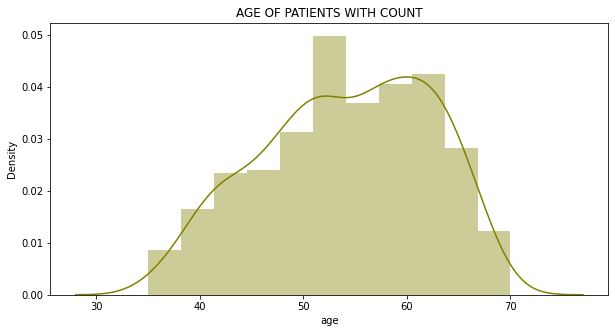

In [81]:
rcParams['figure.figsize'] = 10,5
sns.distplot(df_1['age'], color='olive')
plt.title('AGE OF PATIENTS WITH COUNT')

Text(0.5, 1.0, 'MALE VS FEMALE COUNT AFFECTED BY CHD')

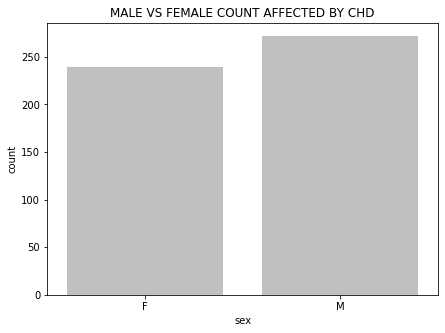

In [82]:
rcParams['figure.figsize'] = 7,5
sns.countplot(df_1['sex'], color='silver')
plt.title('MALE VS FEMALE COUNT AFFECTED BY CHD')

Text(0.5, 1.0, 'Patients with smoking habit')

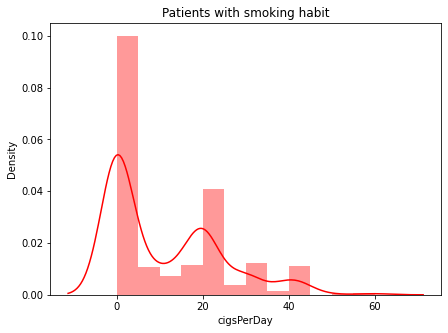

In [83]:
rcParams['figure.figsize'] = 7,5
sns.distplot(df_1['cigsPerDay'], color='red')
plt.title('Patients with smoking habit')

Text(0.5, 1.0, 'Number of Patients who had heart attack')

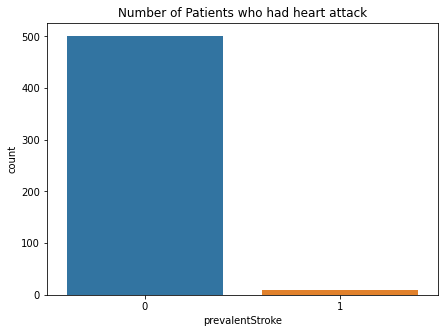

In [84]:
rcParams['figure.figsize'] = 7,5
sns.countplot(df_1['prevalentStroke'])
plt.title('Number of Patients who had heart attack')

Text(0.5, 1.0, 'Number of Patients who have Diabetes')

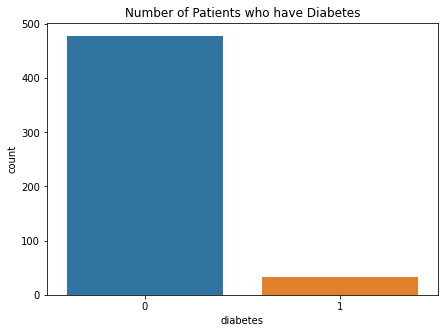

In [85]:
rcParams['figure.figsize'] = 7,5
sns.countplot(df_1['diabetes'])
plt.title('Number of Patients who have Diabetes')

Text(0.5, 1.0, 'Cholestrol levels')

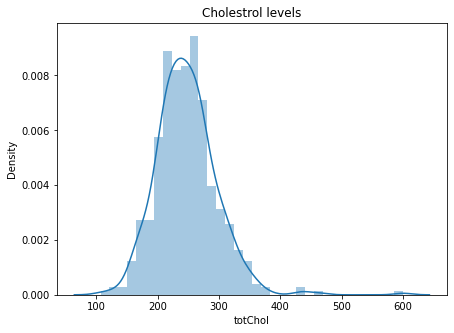

In [86]:
rcParams['figure.figsize'] = 7,5
sns.distplot(df_1['totChol'])
plt.title('Cholestrol levels')

Text(0.5, 1.0, 'Glucose levels')

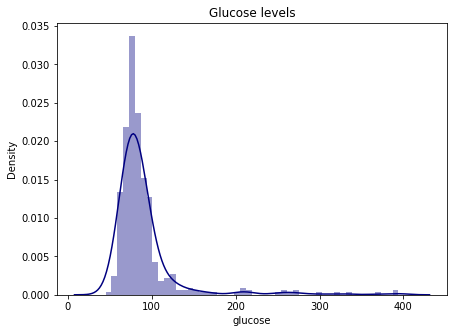

In [87]:
rcParams['figure.figsize'] = 7,5
sns.distplot(df_1['glucose'], color='navy')
plt.title('Glucose levels')

Text(0.5, 1.0, 'Body Mass Index')

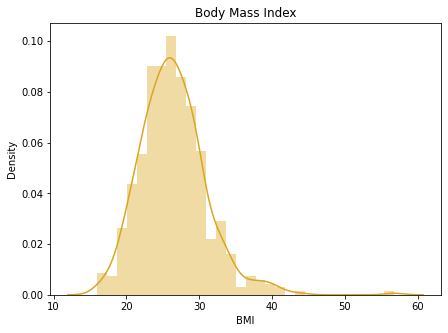

In [88]:
rcParams['figure.figsize'] = 7,5
sns.distplot(df_1['BMI'],color='goldenrod')
plt.title('Body Mass Index')

Text(0.5, 1.0, 'Systolic Blood Pressure')

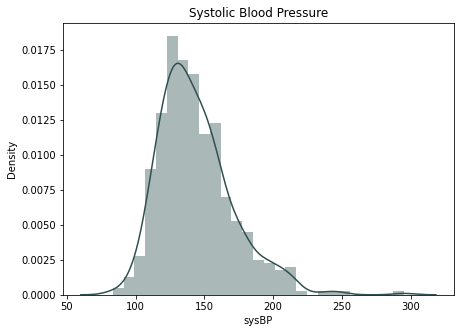

In [89]:
rcParams['figure.figsize'] = 7,5
sns.distplot(df_1['sysBP'],color='darkslategrey')
plt.title('Systolic Blood Pressure')

Text(0.5, 1.0, 'Diastolic Blood Pressure')

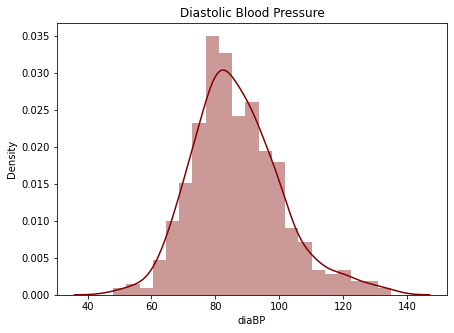

In [90]:
rcParams['figure.figsize'] = 7,5
sns.distplot(df_1['diaBP'],color='maroon')
plt.title('Diastolic Blood Pressure')

Text(0.5, 1.0, 'Heart Rate')

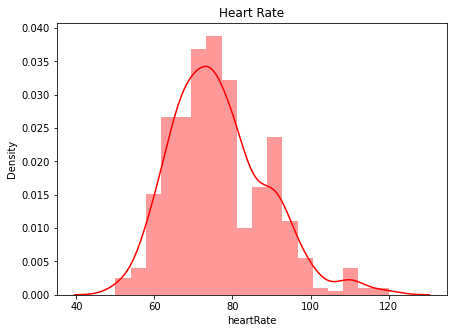

In [91]:
rcParams['figure.figsize'] = 7,5
sns.distplot(df_1['heartRate'],color='red')
plt.title('Heart Rate')

# <b> Data Cleansing

> ## Removing unnecessary Feature

In [92]:
# Checking unique values of feature education
dataset.education.unique()

array([ 2.,  4.,  1.,  3., nan])

As we can see 'education' feature as well as 'id' feature will not help in predicting coronary heart disease, so we'll drop both the feature.

In [93]:
dataset.drop(['id', 'education'], inplace=True, axis=1)

In [94]:
dataset.shape

(3390, 15)

> ## Handling Missing Data


From the entry totals above, many of the features are missing a significant amount of data. Explore these columns further to determine the best approach for each.

In [95]:
# Missing Value Count Function
def show_missing():
    missing = dataset.columns[dataset.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(dataset[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(dataset[show_missing()].isnull().sum().sort_values(ascending = False)/len(dataset)*100,2))

Missing Data Count
glucose       304
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [96]:
print(len(dataset[dataset['cigsPerDay'].isna()][['is_smoking','cigsPerDay']]))

22


>### Feature Glucose

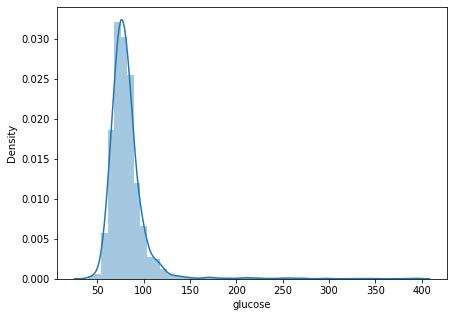

In [97]:
sns.distplot(dataset['glucose'].dropna())

Positively Skewed - So we will impute it with Median

In [98]:
dataset['glucose'] = dataset['glucose'].fillna(dataset['glucose'].median())
print('Glucose value missing after filling with median:', dataset['glucose'].isnull().sum())

Glucose value missing after filling with median: 0


>### Feature BPMeds, totChol, cigsPerDay, BMI, heartRate

As missing data is less than 2% so well drop the rows with missing value

In [99]:
dataset.dropna(axis=0, inplace=True)

In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3272 non-null   int64  
 1   sex              3272 non-null   object 
 2   is_smoking       3272 non-null   object 
 3   cigsPerDay       3272 non-null   float64
 4   BPMeds           3272 non-null   float64
 5   prevalentStroke  3272 non-null   int64  
 6   prevalentHyp     3272 non-null   int64  
 7   diabetes         3272 non-null   int64  
 8   totChol          3272 non-null   float64
 9   sysBP            3272 non-null   float64
 10  diaBP            3272 non-null   float64
 11  BMI              3272 non-null   float64
 12  heartRate        3272 non-null   float64
 13  glucose          3272 non-null   float64
 14  TenYearCHD       3272 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 409.0+ KB


In [101]:
dataset.shape

(3272, 15)

In [102]:
dataset.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1


>## Handling Outliers

In [103]:
# find categorical variables
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 2 categorical variables


In [104]:
# find Numerical variables
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 13 numerical variables


In [105]:
discrete = []
for var in numerical:
    if len(dataset[var].unique())<20:
        print(var, ' values: ', dataset[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

BPMeds  values:  [0. 1.]
prevalentStroke  values:  [0 1]
prevalentHyp  values:  [1 0]
diabetes  values:  [0 1]
TenYearCHD  values:  [0 1]
There are 5 discrete variables


In [106]:
continuous = [var for var in numerical if var not in discrete and var not in ['TenYearCHD']]

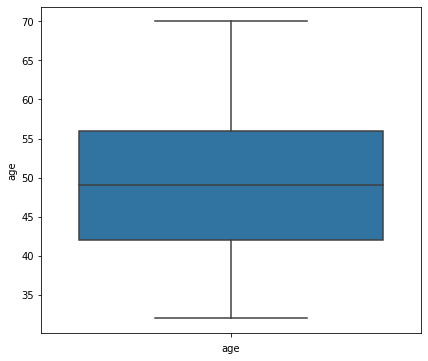

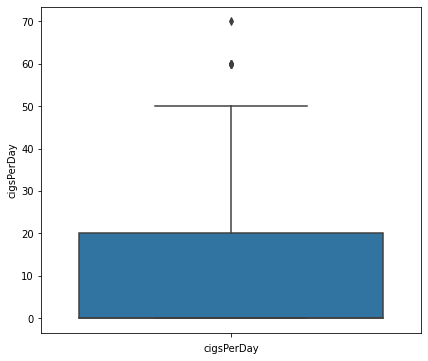

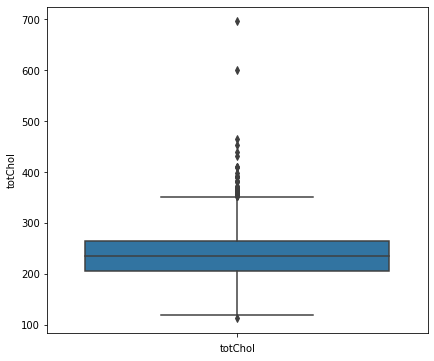

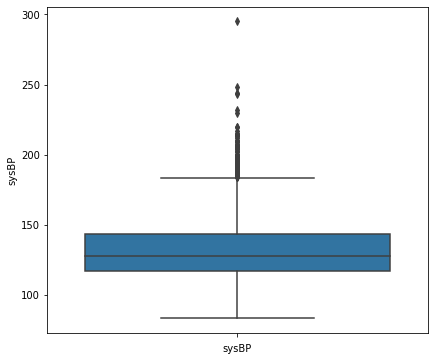

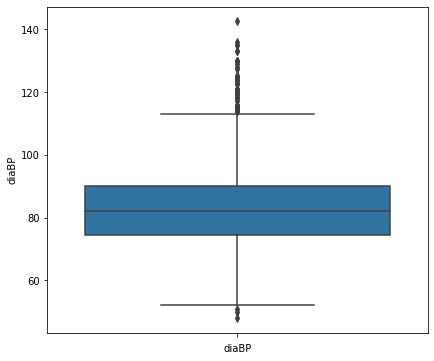

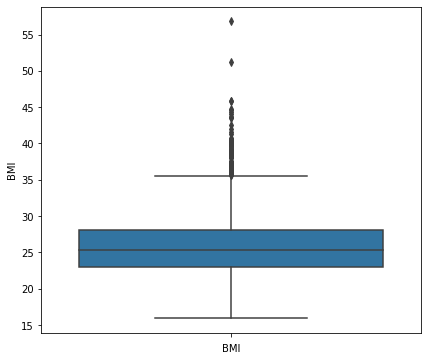

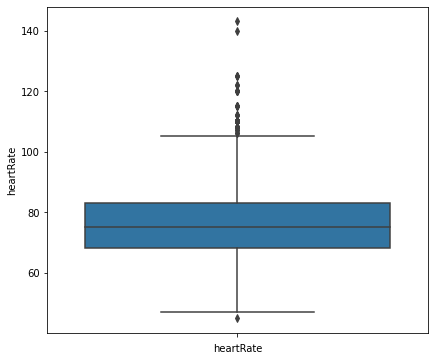

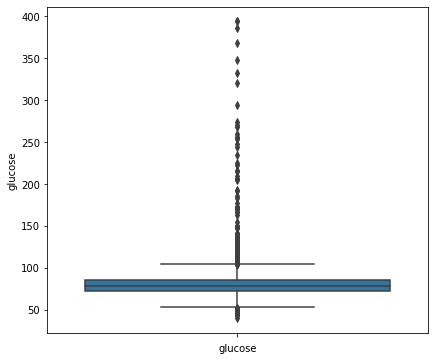

In [107]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=dataset[var])
    fig.set_title('')
    fig.set_ylabel(var)
    fig.set_xlabel(var)

    plt.show()

There are outlier but these outliers will help us to predict CHD

In [108]:
dataset.shape

(3272, 15)

>## Feature Encoding

In [109]:
# Encode Categorical Variables
dataset['is_smoking'] = dataset['is_smoking'].map({'NO':0,'YES':1})

In [110]:
# One hot encoding
dataset = pd.get_dummies(dataset, columns=['sex'])

In [111]:
dataset

,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,sex_F,sex_M
1,36,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,0,1
2,46,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,0
3,50,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,0,1
4,64,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,1,0
5,61,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0,1,0
3385,60,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0,1,0
3386,46,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0,1,0
3387,44,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1,0,1


In [112]:
dataset.shape

(3272, 16)

In [113]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3272 entries, 1 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3272 non-null   int64  
 1   is_smoking       3272 non-null   int64  
 2   cigsPerDay       3272 non-null   float64
 3   BPMeds           3272 non-null   float64
 4   prevalentStroke  3272 non-null   int64  
 5   prevalentHyp     3272 non-null   int64  
 6   diabetes         3272 non-null   int64  
 7   totChol          3272 non-null   float64
 8   sysBP            3272 non-null   float64
 9   diaBP            3272 non-null   float64
 10  BMI              3272 non-null   float64
 11  heartRate        3272 non-null   float64
 12  glucose          3272 non-null   float64
 13  TenYearCHD       3272 non-null   int64  
 14  sex_F            3272 non-null   uint8  
 15  sex_M            3272 non-null   uint8  
dtypes: float64(8), int64(6), uint8(2)
memory usage: 389.8 KB


In [114]:
dataset.columns.values

array(['age', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'sex_F', 'sex_M'],
      dtype=object)

In [115]:
# Move the Dependent Variable in the last place
dataset = dataset[['age', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'sex_F', 'sex_M','TenYearCHD']]

In [116]:
dataset.head()

,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,sex_F,sex_M,TenYearCHD
1,36,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,1,0
2,46,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,1,0,0
3,50,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,0,1,1
4,64,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,1,0,0
5,61,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,0,1


# <b> Creating Independent and Dependent variables

In [117]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# <b>Splitting the dataset into the Training set and Test set

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [119]:
print("Distribution of classes of dependent variable in train :")
print(y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(y_test.value_counts())

Distribution of classes of dependent variable in train :
0    2212
1     405
Name: TenYearCHD, dtype: int64

 Distribution of classes of dependent variable in test :
0    572
1     83
Name: TenYearCHD, dtype: int64


# <b>Feature Scaling

In [120]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# <b> Is our Data balanced?

[Text(0, 0, 'No Risk of CHD'), Text(0, 0, 'Risk of CHD')]

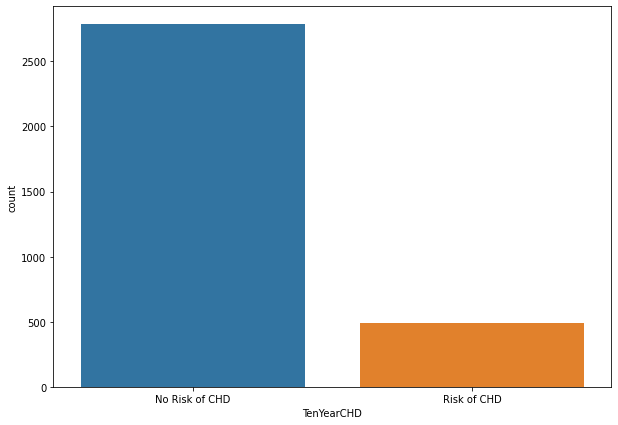

In [121]:
# visualize the target variable
plt.figure(figsize=(10,7))
g = sns.countplot(dataset['TenYearCHD'])
g.set_xticklabels(['No Risk of CHD','Risk of CHD'])

As we can see from the above figure, data set is **imbalanced!** Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predict” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

We'll see how our models peform with this imbalanced data and also after balancing the data

# <b> Balancing the data

>## Synthetic Minority Oversampling Technique (SMOTE)

In [122]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_train_smote, y_train_smote = smote.fit_resample(dataset.iloc[:,0:-1], dataset['TenYearCHD'])

print('Original dataset shape', len(dataset))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 3272
Resampled dataset shape 5568


## Feature Scaling on balanced data

In [123]:
x_train_smote = sc.fit_transform(x_train_smote)

# <b>Functions

In [124]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred):
  cf_matrix = confusion_matrix(y_test, y_pred)
  group_names = ["True Negative","False Positive","False Negative","True Positive"]
  group_counts = ['{0:0.0f}'.format(value) for value in
                  cf_matrix.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='GnBu')
  return

In [125]:
# Function for fetching confusion matrix of imbalance and balanced data
def model_evolution(y_test, y_pred):

  print(classification_report(y_test, y_pred))
  print()
  
  # Calculate roc_auc score on test set
  print("ROC-AUC Score:",round(roc_auc_score(y_test, y_pred), 2))
  print('\n')

  return

# <b> Model Testing

>## <b>Logistic Regression model

>### Training the Logistic Regression model on the Training set

In [126]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

>### Training the Logistic Regression model on the Training set (Balanced Data)

In [127]:
from sklearn.linear_model import LogisticRegression
classifier_smote = LogisticRegression(random_state = 0)
classifier_smote.fit(x_train_smote, y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

>### Predict on test data

In [128]:
y_pred = classifier.predict(X_test)
y_pred_smote = classifier_smote.predict(X_test)

>### Evaluating the Model Performance

Imbalance Data:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       572
           1       0.44      0.05      0.09        83

    accuracy                           0.87       655
   macro avg       0.66      0.52      0.51       655
weighted avg       0.82      0.87      0.82       655


ROC-AUC Score: 0.52




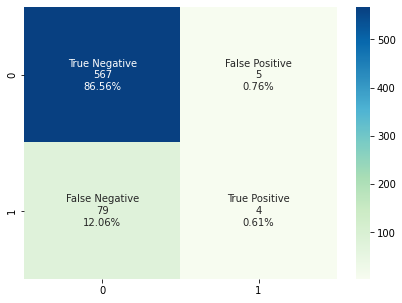

In [129]:
print("Imbalance Data:\n")
plot_confusion_matrix(y_test, y_pred)
model_evolution(y_test, y_pred)

Balanced Data:

              precision    recall  f1-score   support

           0       0.95      0.59      0.73       572
           1       0.22      0.81      0.35        83

    accuracy                           0.61       655
   macro avg       0.59      0.70      0.54       655
weighted avg       0.86      0.61      0.68       655


ROC-AUC Score: 0.7




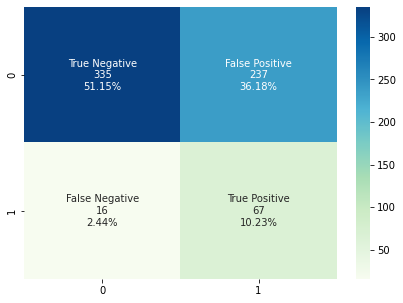

In [130]:
print("Balanced Data:\n")
plot_confusion_matrix(y_test, y_pred_smote)
model_evolution(y_test, y_pred_smote)

>## <b>Decision Tree Classification model

>### Training the Decision Tree Classification model on the Training set

In [131]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

>### Training the Decision Tree Classifier model on the Training set (Balanced Data)

In [132]:
from sklearn.linear_model import LogisticRegression
classifier_smote = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_smote.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

>### Predict on test data

In [133]:
y_pred = classifier.predict(X_test)
y_pred_smote = classifier_smote.predict(X_test)

>### Evaluating the Model Performance

Imbalance Data:

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       572
           1       0.24      0.33      0.28        83

    accuracy                           0.78       655
   macro avg       0.57      0.59      0.57       655
weighted avg       0.81      0.78      0.80       655


ROC-AUC Score: 0.59




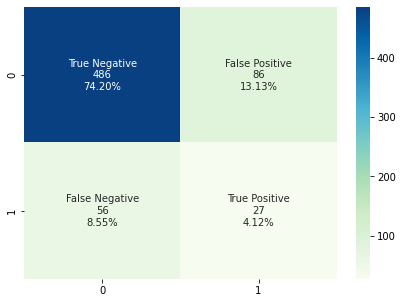

In [134]:
print("Imbalance Data:\n")
plot_confusion_matrix(y_test, y_pred)
model_evolution(y_test, y_pred)

Balanced Data:

              precision    recall  f1-score   support

           0       0.97      0.20      0.34       572
           1       0.15      0.96      0.26        83

    accuracy                           0.30       655
   macro avg       0.56      0.58      0.30       655
weighted avg       0.87      0.30      0.33       655


ROC-AUC Score: 0.58




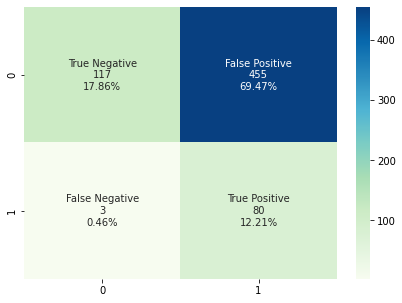

In [135]:
print("Balanced Data:\n")
plot_confusion_matrix(y_test, y_pred_smote)
model_evolution(y_test, y_pred_smote)

>## <b>Random Forest Classification model

>### Training the Random Forest Classification model on the Training set

In [136]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
classifier = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

>### Feature importance check

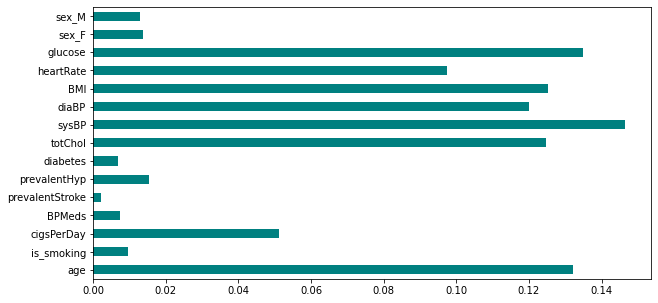

In [137]:
pd.Series(classifier.feature_importances_, index=X.columns).plot(kind='barh',color='teal',figsize=(10,5))

>### Training the Random Forest Classification on the Training set (Balanced Data)

In [138]:
from sklearn.linear_model import LogisticRegression
classifier_smote = RandomForestClassifier(n_estimators = 10, random_state = 0)
classifier_smote.fit(x_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

>### Feature importance check

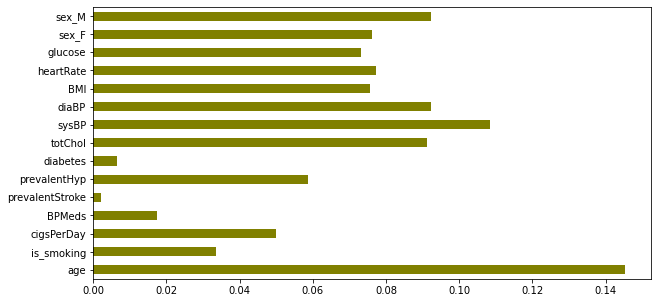

In [139]:
pd.Series(classifier_smote.feature_importances_, index=X.columns).plot(kind='barh',color='olive', figsize=(10,5))

>### Predict on test data

In [140]:
y_pred = classifier.predict(X_test)
y_pred_smote = classifier_smote.predict(X_test)

>### Evaluating the Model Performance

Imbalance Data:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       572
           1       0.50      0.12      0.19        83

    accuracy                           0.87       655
   macro avg       0.69      0.55      0.56       655
weighted avg       0.84      0.87      0.84       655


ROC-AUC Score: 0.55




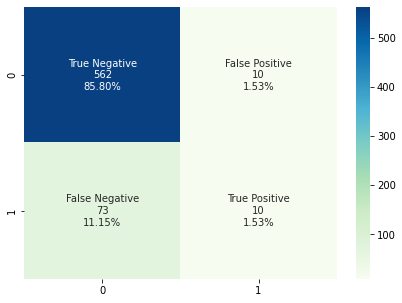

In [141]:
print("Imbalance Data:\n")
plot_confusion_matrix(y_test, y_pred)
model_evolution(y_test, y_pred)

Balanced Data:

              precision    recall  f1-score   support

           0       0.97      0.16      0.28       572
           1       0.14      0.96      0.25        83

    accuracy                           0.27       655
   macro avg       0.56      0.56      0.27       655
weighted avg       0.86      0.27      0.28       655


ROC-AUC Score: 0.56




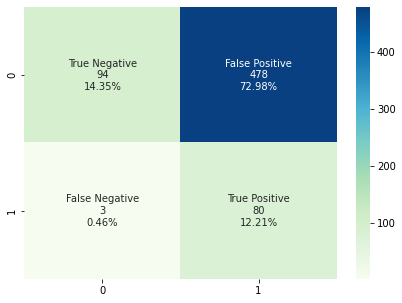

In [142]:
print("Balanced Data:\n")
plot_confusion_matrix(y_test, y_pred_smote)
model_evolution(y_test, y_pred_smote)

>## <b>Naive Bayes Classifier model

>### Training the Naive Bayes model on the Training set

In [143]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

>### Training the Naive Bayes model on the Training set (Balanced Data)

In [144]:
from sklearn.linear_model import LogisticRegression
classifier_smote = GaussianNB()
classifier_smote.fit(x_train_smote, y_train_smote)

GaussianNB(priors=None, var_smoothing=1e-09)

>### Predict on test data

In [145]:
y_pred = classifier.predict(X_test)
y_pred_smote = classifier_smote.predict(X_test)

>### Evaluating the Model Performance

Imbalance Data:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       572
           1       0.41      0.23      0.29        83

    accuracy                           0.86       655
   macro avg       0.65      0.59      0.61       655
weighted avg       0.83      0.86      0.84       655


ROC-AUC Score: 0.59




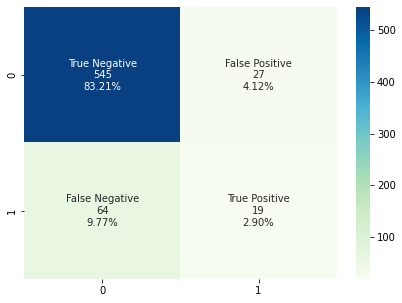

In [146]:
print("Imbalance Data:\n")
plot_confusion_matrix(y_test, y_pred)
model_evolution(y_test, y_pred)

Balanced Data:

              precision    recall  f1-score   support

           0       0.92      0.83      0.88       572
           1       0.31      0.53      0.39        83

    accuracy                           0.79       655
   macro avg       0.62      0.68      0.64       655
weighted avg       0.85      0.79      0.81       655


ROC-AUC Score: 0.68




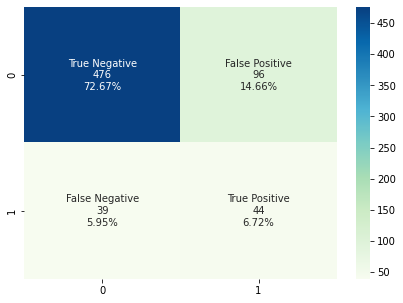

In [147]:
print("Balanced Data:\n")
plot_confusion_matrix(y_test, y_pred_smote)
model_evolution(y_test, y_pred_smote)

>## <b>K-Nearest Neighbor model

>### Training the K-NN model on the Training set

In [148]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

>### Training the K-NN model model on the Training set (Balanced Data)

In [149]:
from sklearn.linear_model import LogisticRegression
classifier_smote = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_smote.fit(x_train_smote, y_train_smote)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

>### Predict on test data

In [150]:
y_pred = classifier.predict(X_test)
y_pred_smote = classifier_smote.predict(X_test)

>### Evaluating the Model Performance

Imbalance Data:

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       572
           1       0.35      0.11      0.17        83

    accuracy                           0.86       655
   macro avg       0.61      0.54      0.54       655
weighted avg       0.81      0.86      0.83       655


ROC-AUC Score: 0.54




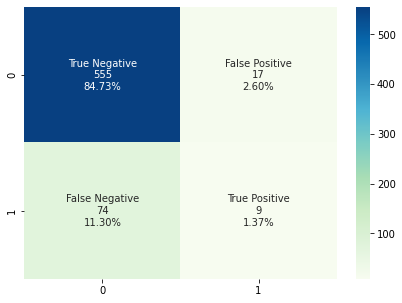

In [151]:
print("Imbalance Data:\n")
plot_confusion_matrix(y_test, y_pred)
model_evolution(y_test, y_pred)

Balanced Data:

              precision    recall  f1-score   support

           0       0.99      0.77      0.87       572
           1       0.37      0.95      0.54        83

    accuracy                           0.79       655
   macro avg       0.68      0.86      0.70       655
weighted avg       0.91      0.79      0.82       655


ROC-AUC Score: 0.86




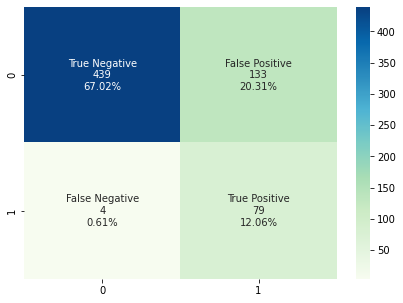

In [152]:
print("Balanced Data:\n")
plot_confusion_matrix(y_test, y_pred_smote)
model_evolution(y_test, y_pred_smote)

>### Hyperparameter tuning


In [153]:
k_range = list(range(1,31))

estimator_KNN = KNeighborsClassifier(algorithm='auto')
parameters_KNN = {
    'n_neighbors': k_range,
    'leaf_size': (10,20,30),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}
                   
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=estimator_KNN,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5,
    verbose=3
)
grid_search_KNN.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1564 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 2044 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  9.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': (10, 20, 30),
                         'metric': ('minkowski', 'chebyshev'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'p': (1, 2), 'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [154]:
print(grid_search_KNN.best_score_)
print()
print(grid_search_KNN.best_params_)
print()
print(grid_search_KNN.best_estimator_)

0.9164876980228763

{'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                     weights='uniform')


>### Predict on test data

In [155]:
y_pred_smote = grid_search_KNN.best_estimator_.predict(X_test)

>### Evaluating the Model Performance

Balanced Data:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       572
           1       1.00      0.96      0.98        83

    accuracy                           1.00       655
   macro avg       1.00      0.98      0.99       655
weighted avg       1.00      1.00      1.00       655


ROC-AUC Score: 0.98




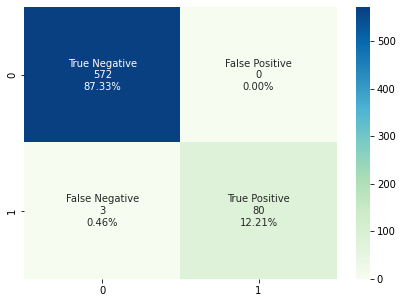

In [156]:
print("Balanced Data:\n")
plot_confusion_matrix(y_test, y_pred_smote)
model_evolution(y_test, y_pred_smote)

>## <b>Support Vector Machine model

>### Training the SVM (Linear) model on the Training set

In [157]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

>### Training the SVM (Linear) model on the Training set (Balanced Data)



In [158]:
from sklearn.linear_model import LogisticRegression
classifier_smote = SVC(kernel = 'linear', random_state = 0)
classifier_smote.fit(x_train_smote, y_train_smote)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

>### Predict on test data

In [159]:
y_pred = classifier.predict(X_test)
y_pred_smote = classifier_smote.predict(X_test)

>### Evaluating the Model Performance

Imbalance Data:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       572
           1       0.00      0.00      0.00        83

    accuracy                           0.87       655
   macro avg       0.44      0.50      0.47       655
weighted avg       0.76      0.87      0.81       655


ROC-AUC Score: 0.5




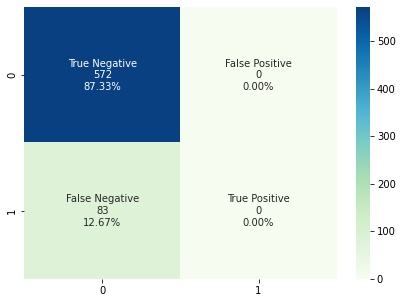

In [160]:
print("Imbalance Data:\n")
plot_confusion_matrix(y_test, y_pred)
model_evolution(y_test, y_pred)

Balanced Data:

              precision    recall  f1-score   support

           0       0.96      0.55      0.70       572
           1       0.21      0.84      0.34        83

    accuracy                           0.58       655
   macro avg       0.59      0.70      0.52       655
weighted avg       0.87      0.58      0.65       655


ROC-AUC Score: 0.7




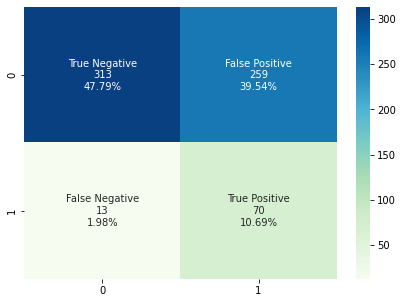

In [161]:
print("Balanced Data:\n")
plot_confusion_matrix(y_test, y_pred_smote)
model_evolution(y_test, y_pred_smote)

>### Training the SVM (rbf) model on the Training set

In [162]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

>### Training the SVM (rbf) model on the Training set (Balanced Data)



In [163]:
from sklearn.linear_model import LogisticRegression
classifier_smote = SVC(kernel = 'rbf', random_state = 0)
classifier_smote.fit(x_train_smote, y_train_smote)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

>### Predict on test data

In [164]:
y_pred = classifier.predict(X_test)
y_pred_smote = classifier_smote.predict(X_test)

>### Evaluating the Model Performance

Imbalance Data:

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       572
           1       0.00      0.00      0.00        83

    accuracy                           0.87       655
   macro avg       0.44      0.50      0.47       655
weighted avg       0.76      0.87      0.81       655


ROC-AUC Score: 0.5




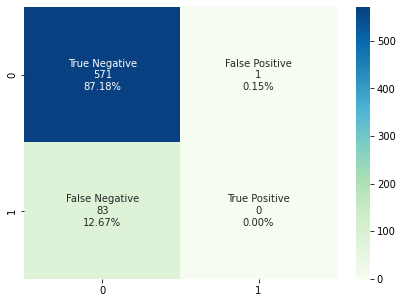

In [165]:
print("Imbalance Data:\n")
plot_confusion_matrix(y_test, y_pred)
model_evolution(y_test, y_pred)

Balanced Data:

              precision    recall  f1-score   support

           0       0.96      0.71      0.82       572
           1       0.28      0.78      0.42        83

    accuracy                           0.72       655
   macro avg       0.62      0.75      0.62       655
weighted avg       0.87      0.72      0.77       655


ROC-AUC Score: 0.75




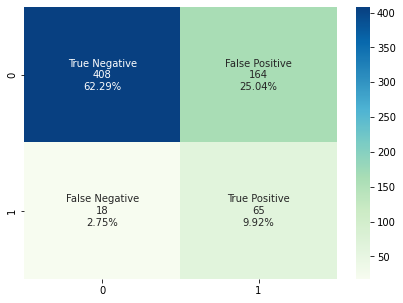

In [166]:
print("Balanced Data:\n")
plot_confusion_matrix(y_test, y_pred_smote)
model_evolution(y_test, y_pred_smote)

>### Hyperparameter tuning


In [167]:
# defining parameter range
param_grid = {'C': [ 0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [168]:
# Create an instance of the RandomForestClassifier
svc_model = SVC()
# Grid search
svc_grid = GridSearchCV(svc_model, param_grid, refit = True, verbose = 3)

# fitting the model for grid search
svc_grid.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.706, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.656, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.749, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.694, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.710, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.694, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.697, total=   1.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.748, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.722, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [169]:
svc_grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [170]:
svc_grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [171]:
svc_grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [172]:
svc_grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

>### Predict on test data

In [173]:
# Making predictions on test data
y_pred_smote = svc_grid.best_estimator_.predict(X_test)

>### Evaluating the Model Performance

Balanced Data:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       572
           1       0.95      0.98      0.96        83

    accuracy                           0.99       655
   macro avg       0.97      0.98      0.98       655
weighted avg       0.99      0.99      0.99       655


ROC-AUC Score: 0.98




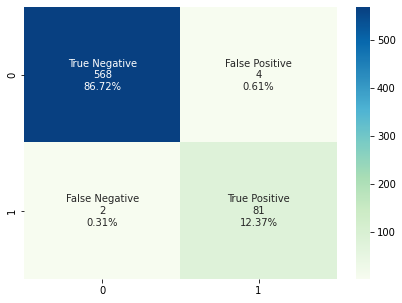

In [174]:
print("Balanced Data:\n")
plot_confusion_matrix(y_test, y_pred_smote)
model_evolution(y_test, y_pred_smote)

---
# <b>End of Analysis and Prediction

---